In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
result = {'molgen_prott5_KCAT': {'TP': 268, 'FP': 93, 'TN': 1481, 'FN': 168, 'Accuracy': 0.8701492537313433, 'Precision': 0.7423822714681441, 'Recall': 0.6146788990825688, 'F1': 0.6725219573400251},'molgen_prott5_KKM': {'TP': 147, 'FP': 44, 'TN': 491, 'FN': 53, 'Accuracy': 0.8680272108843538, 'Precision': 0.7696335078534031, 'Recall': 0.735, 'F1': 0.7519181585677749},
'UniKP_KCAT': {'TP': 271, 'FP': 93, 'TN': 1481, 'FN': 165, 'Accuracy': 0.8716417910447761, 'Precision': 0.7445054945054945, 'Recall': 0.6215596330275229, 'F1': 0.6775}, 
'DLTKcat': {'TP': 131, 'FP': 89, 'TN': 780, 'FN': 147, 'Accuracy': 0.7942458587619878, 'Precision': 0.5954545454545455, 'Recall': 0.4712230215827338, 'F1': 0.5261044176706827}, 
'CataPro_KKM': {'TP': 138, 'FP': 77, 'TN': 458, 'FN': 62, 'Accuracy': 0.8108843537414966, 'Precision': 0.641860465116279, 'Recall': 0.69, 'F1': 0.6650602409638554}, 
'CataPro_KCAT': {'TP': 217, 'FP': 153, 'TN': 1421, 'FN': 219, 'Accuracy': 0.8149253731343283, 'Precision': 0.5864864864864865, 'Recall': 0.49770642201834864, 'F1': 0.5384615384615384},
'UniKP_KKM': {'TP': 141, 'FP': 47, 'TN': 488, 'FN': 59, 'Accuracy': 0.85578231292517, 'Precision': 0.75, 'Recall': 0.705, 'F1': 0.7268041237113402}, 
'EITLEM_KKM': {'TP': 136, 'FP': 68, 'TN': 467, 'FN': 64, 'Accuracy': 0.8204081632653061, 'Precision': 0.6666666666666666, 'Recall': 0.68, 'F1': 0.6732673267326733}, 
'DeepEnzyme': {'TP': 230, 'FP': 110, 'TN': 1464, 'FN': 206, 'Accuracy': 0.8427860696517413, 'Precision': 0.6764705882352942, 'Recall': 0.5275229357798165, 'F1': 0.5927835051546392}, 
'EITLEM_KCAT': {'TP': 241, 'FP': 134, 'TN': 1440, 'FN': 195, 'Accuracy': 0.836318407960199, 'Precision': 0.6426666666666667, 'Recall': 0.5527522935779816, 'F1': 0.594327990135635}, 
'DLKcat': {'TP': 245, 'FP': 155, 'TN': 1419, 'FN': 191, 'Accuracy': 0.8278606965174129, 'Precision': 0.6125, 'Recall': 0.5619266055045872, 'F1': 0.5861244019138756},
'TurNuP':{'TP': 385, 'FP': 134, 'TN': 1403, 'FN': 149,'Accuracy': 0.8633510381458233,
'Precision': 0.7418111753371869,'Recall': 0.7209737827715356,'F1': 0.7312440645773979},
}

In [2]:
model_names = list(result.keys())
print(f"Number of models: {len(model_names)}")
sum_dict = {}
for model in model_names:
    sum_dict[model] = result[model]['TP'] + result[model]['FP'] + result[model]['TN'] + result[model]['FN']
print(sum_dict)


Number of models: 12
{'molgen_prott5_KCAT': 2010, 'molgen_prott5_KKM': 735, 'UniKP_KCAT': 2010, 'DLTKcat': 1147, 'CataPro_KKM': 735, 'CataPro_KCAT': 2010, 'UniKP_KKM': 735, 'EITLEM_KKM': 735, 'DeepEnzyme': 2010, 'EITLEM_KCAT': 2010, 'DLKcat': 2010, 'TurNuP': 2071}


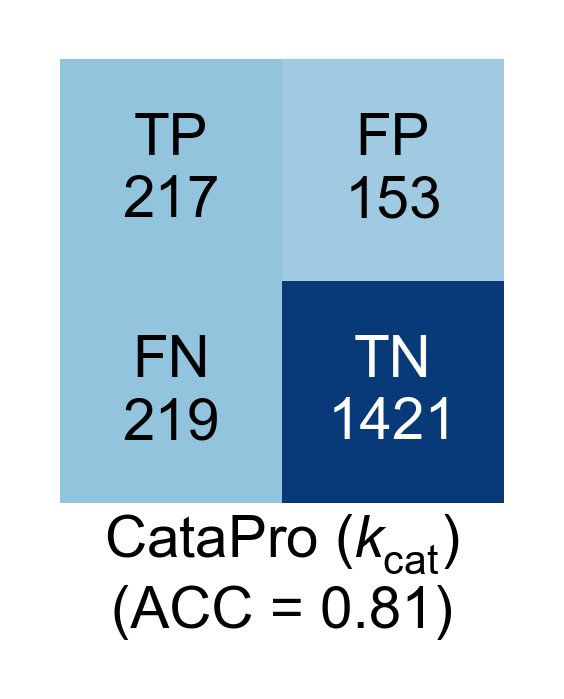

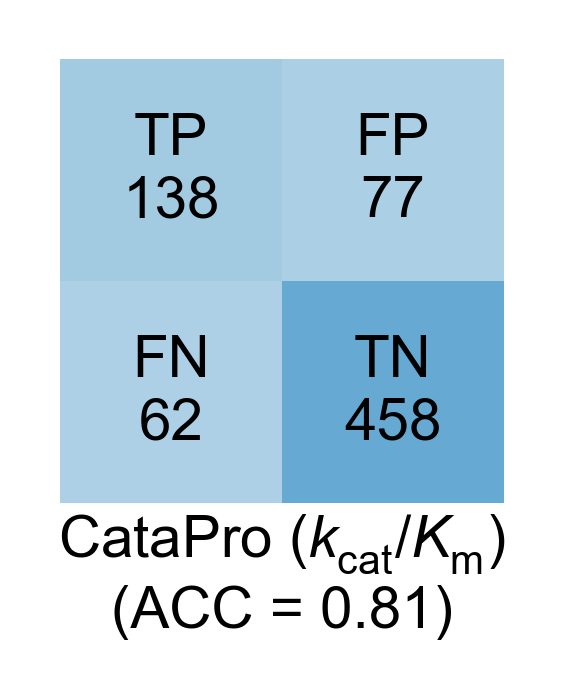

In [3]:
def ppp(model_name, title):
    confusion_matrix = np.array([[result[model_name]['TP'], result[model_name]['FP']], [result[model_name]['FN'], result[model_name]['TN']]])
    yeast8_Accuracy = result[model_name]['Accuracy']
    
    plt.figure(figsize=(1, 1), dpi=600)
    plt.rcParams.update({
        'font.size': 7,
        'font.family': 'Arial',
        'mathtext.fontset': 'custom',
        'mathtext.rm': 'Arial',
        'mathtext.it': 'Arial:italic',
        'mathtext.bf': 'Arial:bold',
        'pdf.fonttype': 42,
        'ps.fonttype': 42
    })

    plt.subplots_adjust(left=0.13, right=0.87, bottom=0.13, top=0.87)
    original_cmap = plt.get_cmap('Blues')
    subset_colors = original_cmap(np.linspace(0.3, 1.0, 256))
    custom_blues_cmap = ListedColormap(subset_colors)
    plt.imshow(confusion_matrix, cmap=custom_blues_cmap, interpolation='nearest', vmin=1, vmax=1500, aspect=1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.text(0, 0, f"TP\n{confusion_matrix[0, 0]}", ha='center', va='center', fontsize=7, color='black')
    plt.text(1, 0, f"FP\n{confusion_matrix[0, 1]}", ha='center', va='center', fontsize=7, color='black')
    plt.text(0, 1, f"FN\n{confusion_matrix[1, 0]}", ha='center', va='center', fontsize=7, color='black')
    if confusion_matrix[1, 1]/confusion_matrix.sum() > 0.67:
        plt.text(1, 1, f"TN\n{confusion_matrix[1, 1]}", ha='center', va='center', fontsize=7, color='white')
    else:
        plt.text(1, 1, f"TN\n{confusion_matrix[1, 1]}", ha='center', va='center', fontsize=7, color='black')

    plt.xlabel(f"{title}\n(ACC = {yeast8_Accuracy:.2f})", 
             fontsize=7, labelpad=1)

    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0)
    if 'KCAT' in model_name or 'TurNuP' in model_name or 'Kcat' in model_name or 'DeepEnzyme' in model_name:
        figname = f'./pdf/figS3a_{model_name}_mutant_direction_prediction.pdf'
    else:
        figname = f'./pdf/figS3b_{model_name}_mutant_direction_prediction.pdf'
    plt.savefig(figname, dpi=600, bbox_inches='tight', pad_inches=0.2)
    plt.show()
ppp('CataPro_KCAT', r'CataPro ($\mathit{k}_\mathrm{cat}$)')
# ppp('CataPro_KM'  , 'CataPro (Km)')
ppp('CataPro_KKM' , r'CataPro ($\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$)')

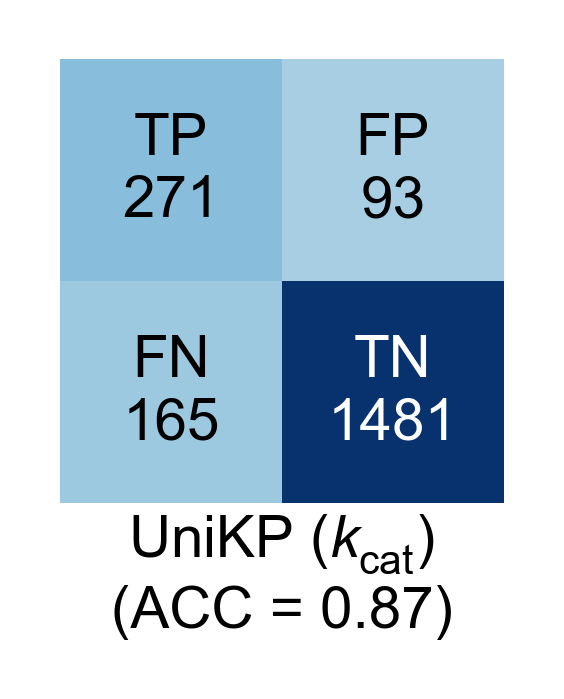

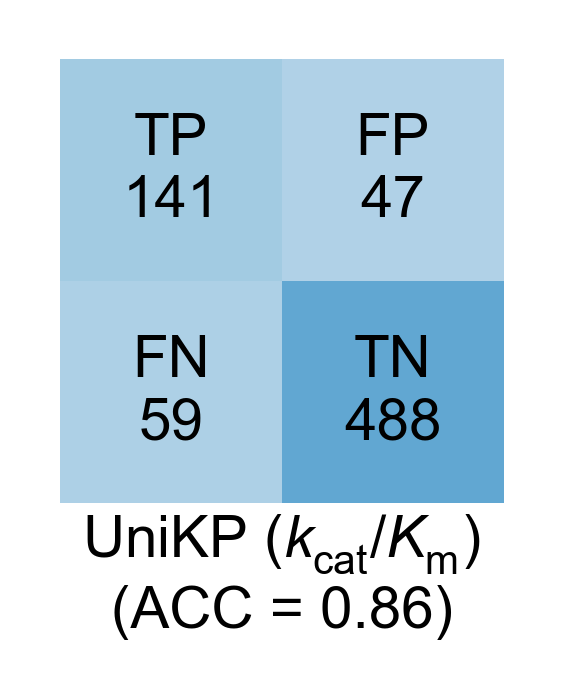

In [4]:
ppp('UniKP_KCAT', r'UniKP ($\mathit{k}_\mathrm{cat}$)')
# ppp('UniKP_KM'  , 'UniKP (Km)')
ppp('UniKP_KKM' , r'UniKP ($\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$)')

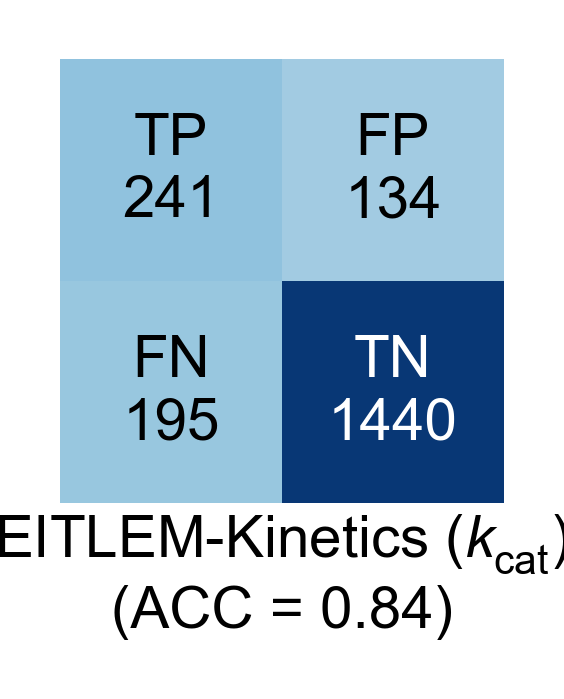

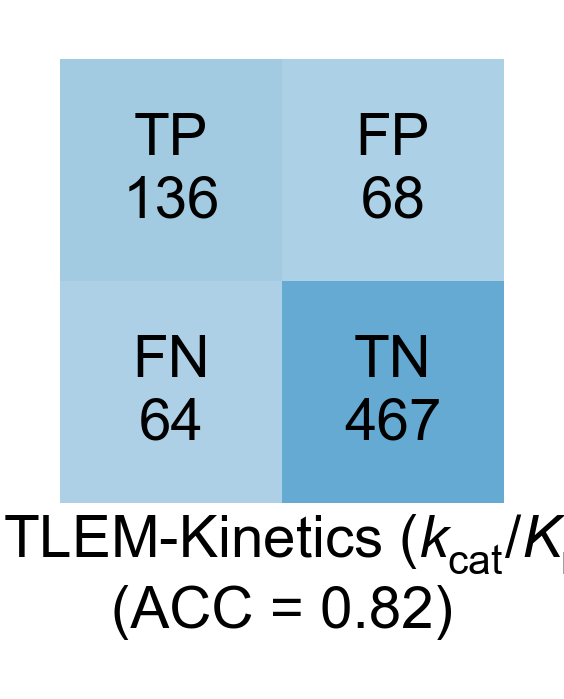

In [5]:
ppp('EITLEM_KCAT', r'EITLEM-Kinetics ($\mathit{k}_\mathrm{cat}$)')
# ppp('EITLEM_KM'  , 'EITLEM-Kinetics (Km)')
ppp('EITLEM_KKM' , r'EITLEM-Kinetics ($\mathit{k}_\mathrm{cat}/\mathit{K}_\mathrm{m}$)')

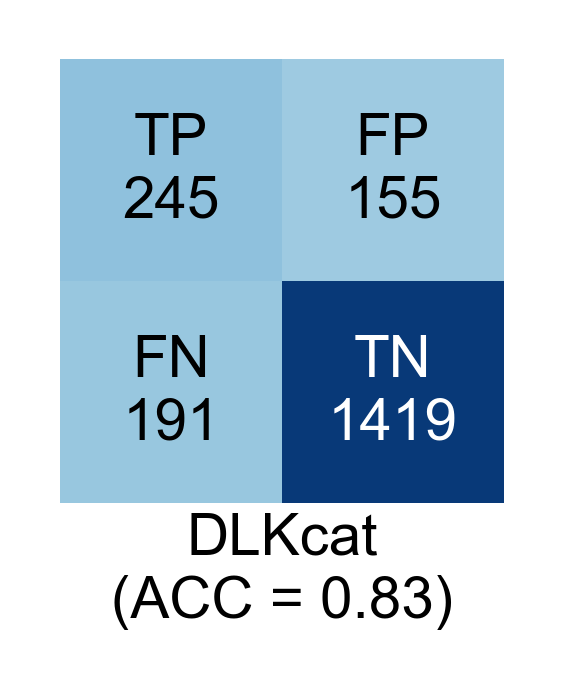

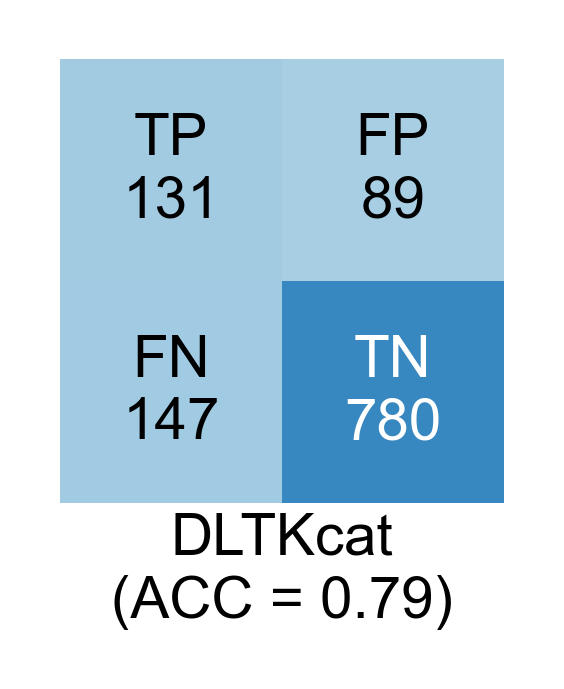

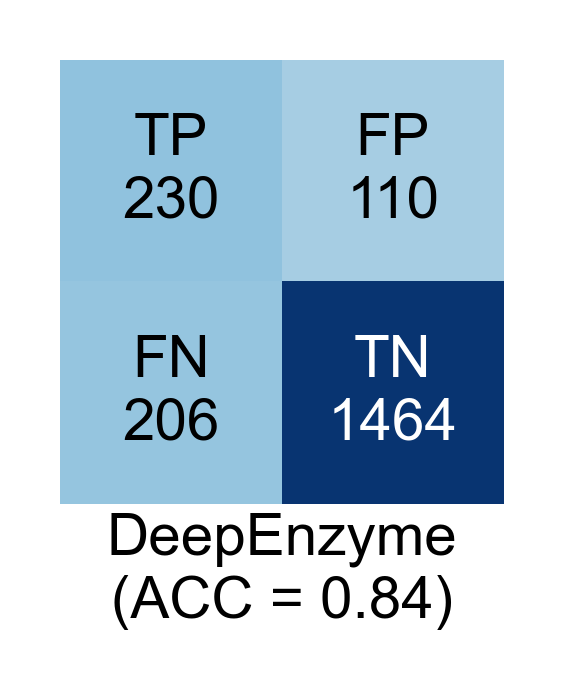

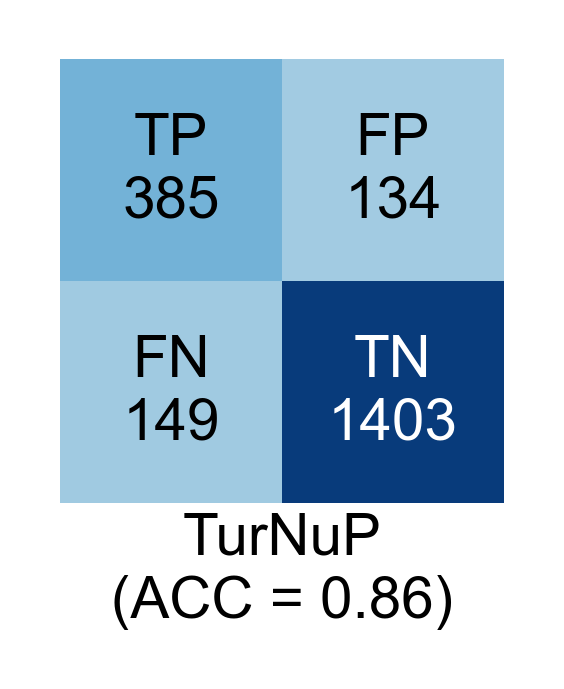

In [6]:
ppp('DLKcat', 'DLKcat')
ppp('DLTKcat', 'DLTKcat')
ppp('DeepEnzyme', 'DeepEnzyme')
ppp('TurNuP', 'TurNuP')
# ppp('BoostKM', 'BoostKM')